All reactions

In [18]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [29]:

power_list = [0, 400, 800, 1.2e3, 1.6e3]
Le=[]
LXe=[]
LXe_ion=[]
tracked_variables = {}
for i in range(5):
    log_file_path = '../logs/all_reactions'+str(i)+'.json'
    print(log_file_path)
    with open(log_file_path, 'r') as file:
        tracked_variables = json.load(file)
    Le.append(tracked_variables["e_density"][-1])
    LXe.append(tracked_variables["Xe_density"][-1])
    LXe_ion.append(tracked_variables["Xe+_density"][-1])


../logs/all_reactions0.json
../logs/all_reactions1.json
../logs/all_reactions2.json
../logs/all_reactions3.json
../logs/all_reactions4.json


In [30]:
print(LXe)

[5.970489990970997e+19, 5.9599242845056885e+19, 5.949381511004366e+19, 5.938861527322343e+19, 5.928364188623523e+19]


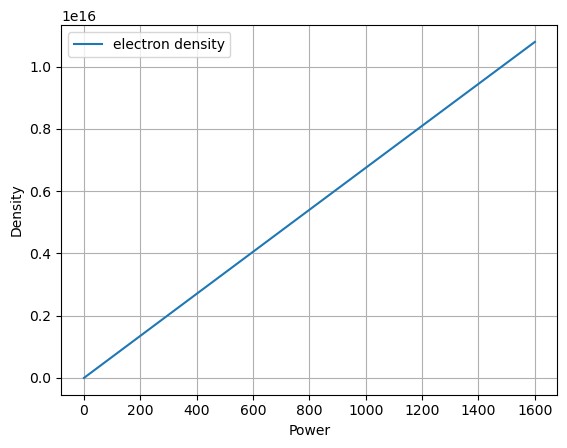

In [31]:
plt.plot(power_list,Le, label="electron density")
plt.grid()
plt.xlabel("Power")
plt.ylabel("Density")
plt.legend()

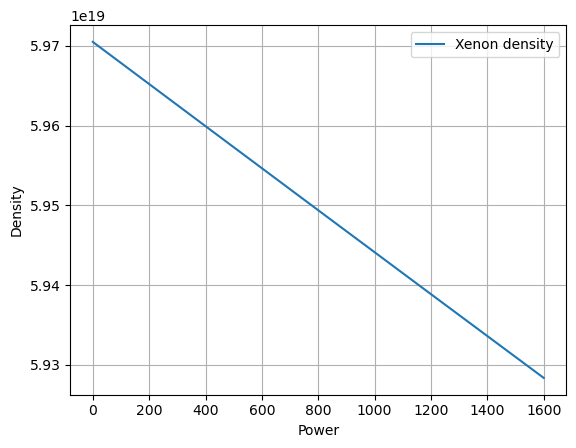

In [32]:
plt.plot(power_list,LXe, label="Xenon density")
plt.grid()
plt.xlabel("Power")
plt.ylabel("Density")
plt.legend()

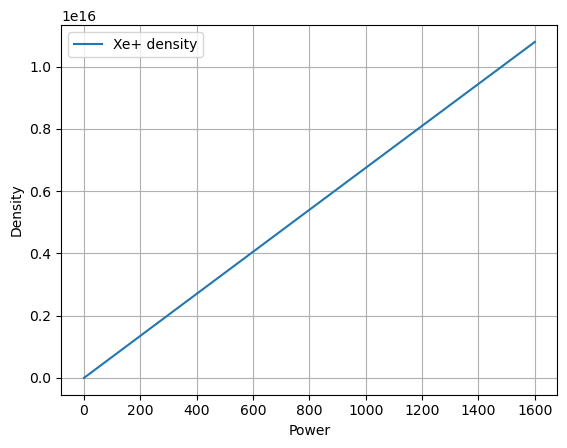

In [33]:
plt.plot(power_list,LXe_ion, label="Xe+ density")
plt.grid()
plt.xlabel("Power")
plt.ylabel("Density")
plt.legend()

ValueError: x and y must have same first dimension, but have shapes (5,) and (2341,)

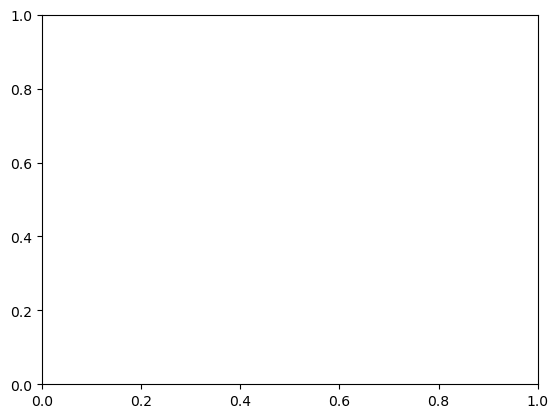

In [16]:
plot_variables(['e_density','Xe_density', 'Xe+_density'], [])
plot_variables(['e_density'], ['Xe_density'])
plot_variables(['dy_e_density'], ['dy_Xe_density', 'dy_Xe+_density'])
plot_variables(['Xe+_density'],[])
plot_variables(['e_density'],[])

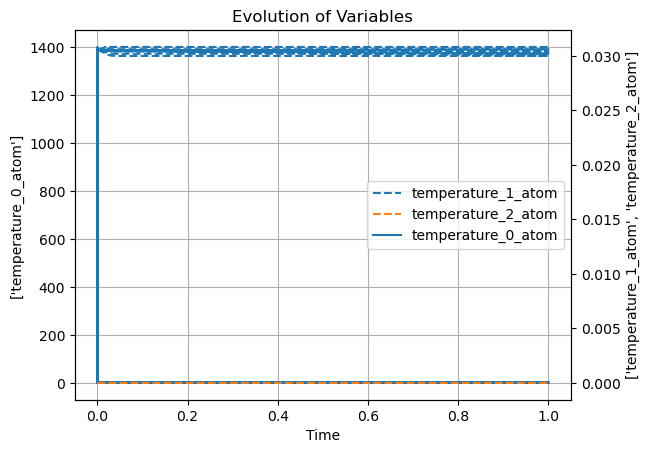

C:\Users\verdi\AppData\Local\Temp\ipykernel_20032\1856211196.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend(loc='best')


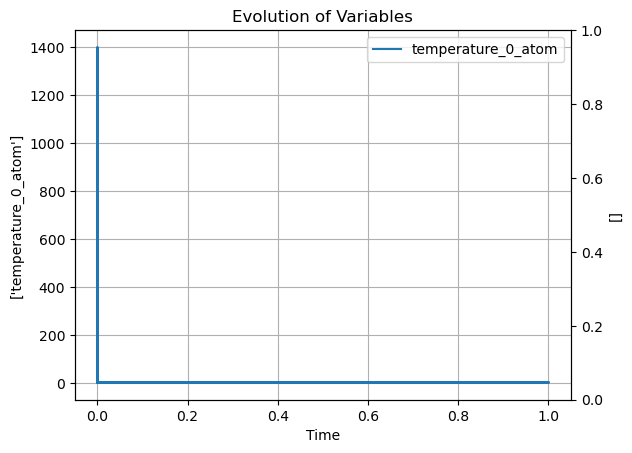

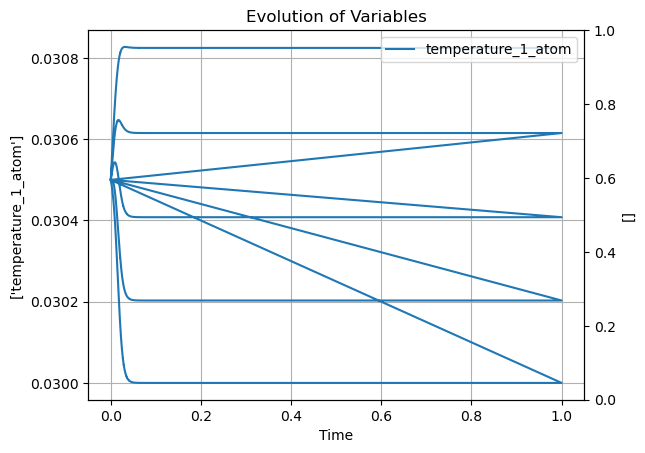

In [ ]:
plot_variables(["temperature_0_atom"], ["temperature_1_atom", "temperature_2_atom"])
#plot_variables(["dy_temperature_0_atom"], ["dy_temperature_1_atom", "dy_temperature_2_atom"])
plot_variables(["temperature_0_atom"],[])
plot_variables(["temperature_1_atom"],[])


Asymptote horizontale à la température des électrons = 0.054 eV d'après la simu json. Donc cohérent avec valeur théorique.

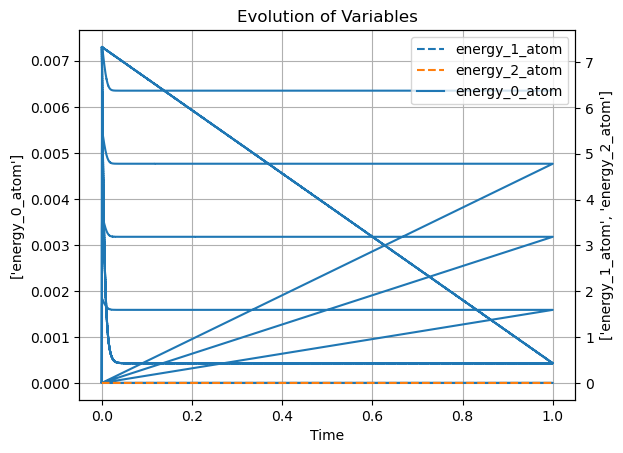

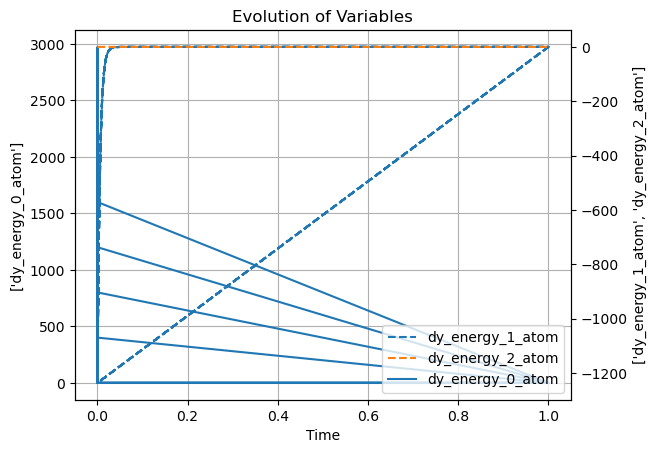

In [ ]:
plot_variables(['energy_0_atom'], ['energy_1_atom', 'energy_2_atom'])
plot_variables(['dy_energy_0_atom'], ['dy_energy_1_atom', 'dy_energy_2_atom'])

C:\Users\verdi\AppData\Local\Temp\ipykernel_20032\1856211196.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend(loc='best')


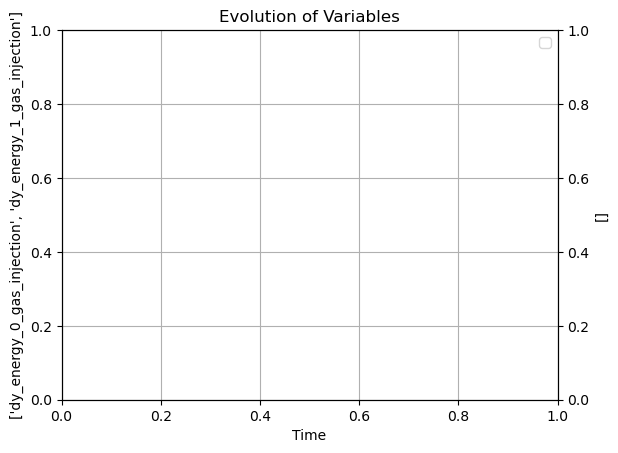

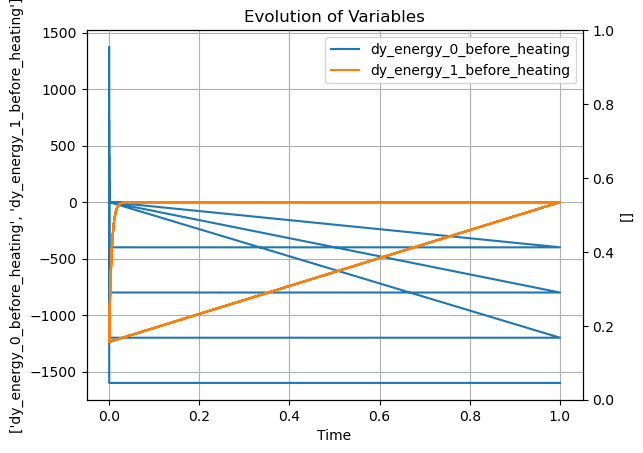

In [ ]:
plot_variables(['dy_energy_0_gas_injection', 'dy_energy_1_gas_injection'], [])
plot_variables(['dy_energy_0_before_heating', 'dy_energy_1_before_heating'], [])

C:\Users\verdi\AppData\Local\Temp\ipykernel_20032\1856211196.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend(loc='best')


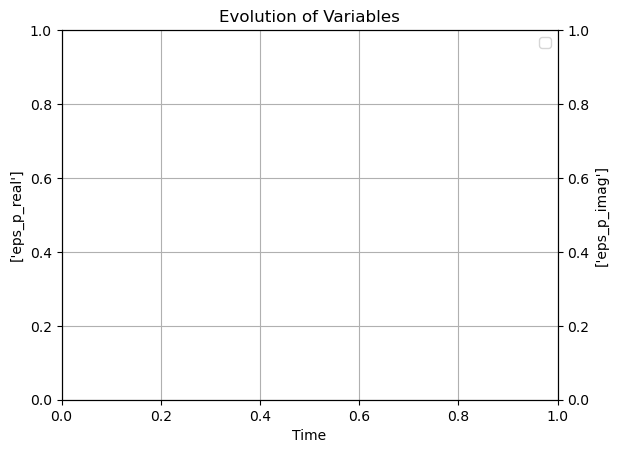

In [ ]:
plot_variables(["eps_p_real"], ["eps_p_imag"])

C:\Users\verdi\AppData\Local\Temp\ipykernel_20032\1856211196.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend(loc='best')


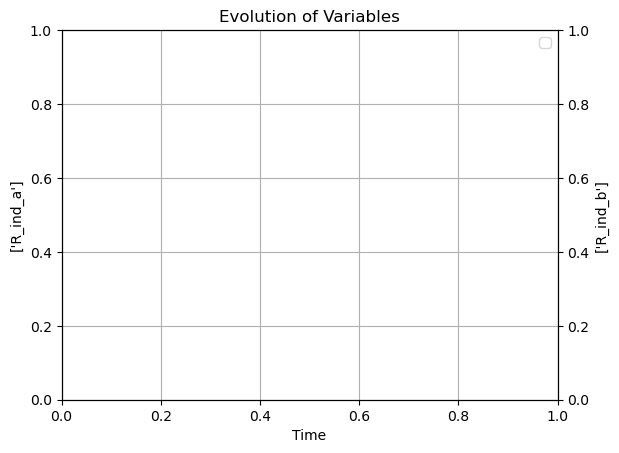

In [ ]:
plot_variables(["R_ind_a"], ["R_ind_b"])

C:\Users\verdi\AppData\Local\Temp\ipykernel_20032\1856211196.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend(loc='best')


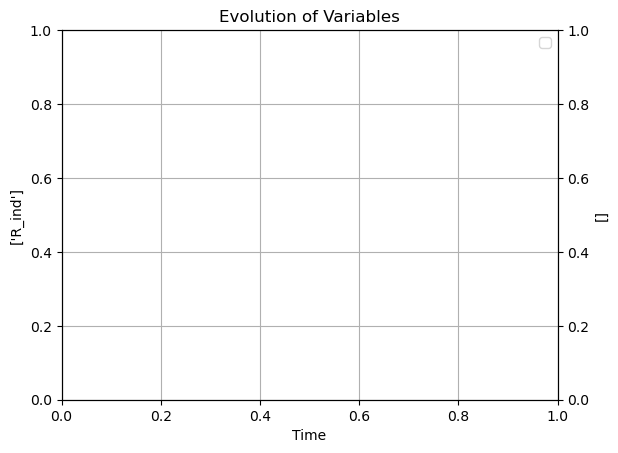

In [ ]:
plot_variables(["R_ind"], [])